<a href="https://colab.research.google.com/github/raffiilham/PVCK_Ganjil_2024/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **D. TUGAS PRAKTIKUM**

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Global Threeshold**

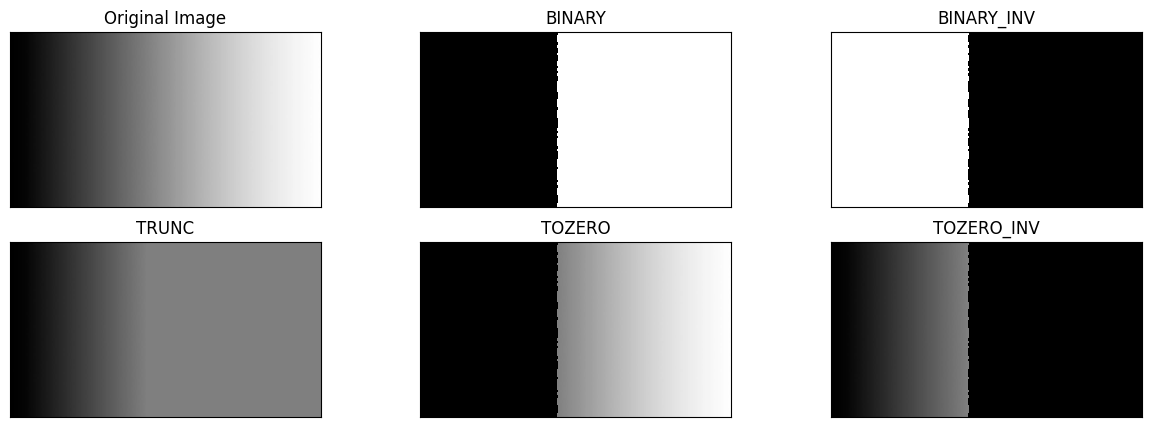

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/images/gradient.jpg')
img = cv.imread(filename)
thresh = 127
#nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

### **Adaptive Threshold**

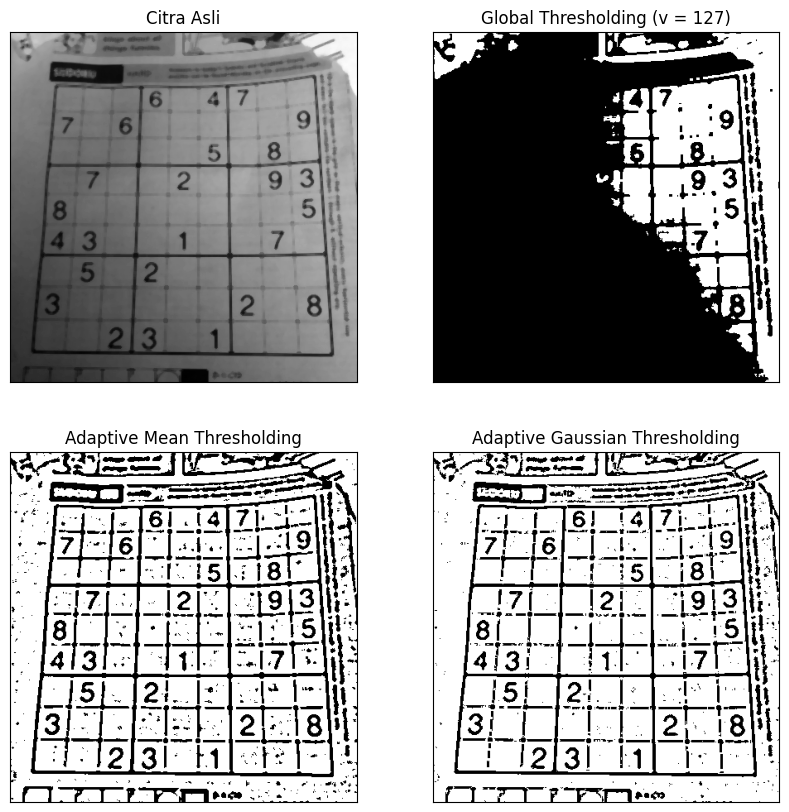

In [5]:
filename = ('/content/drive/MyDrive/PCVK/images/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)',  'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

## **Otsu’s Threshold**

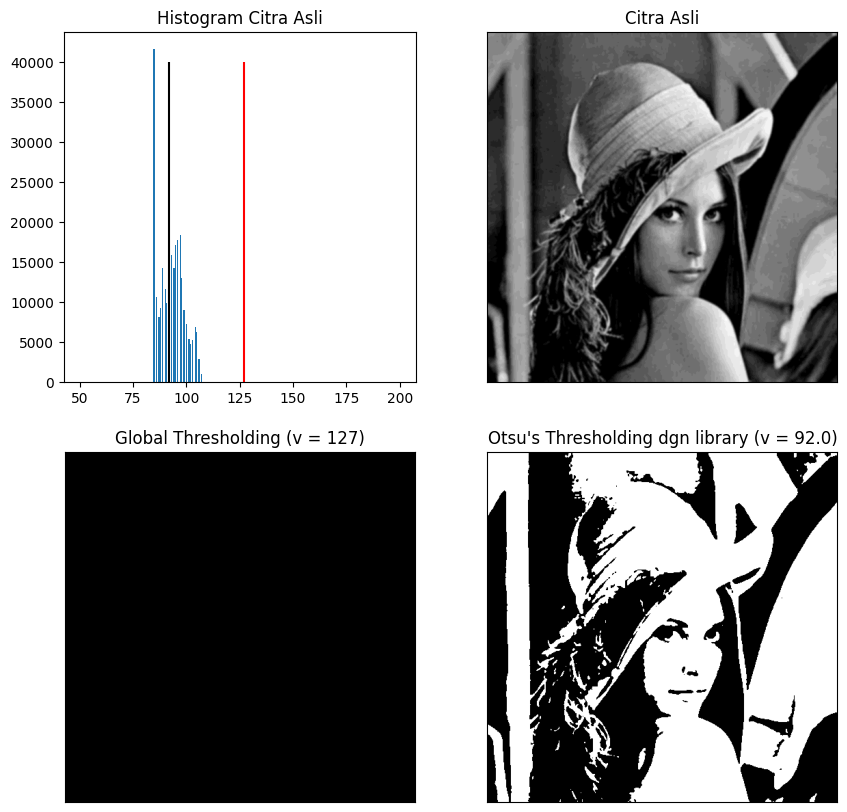

In [8]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/images/lena_gs_lc2.jpg')
# Check if the image file exists
import os
if not os.path.exists(filename):
  raise FileNotFoundError(f"Image file not found: {filename}")

img = cv.imread(filename,0)
# Check if the image was loaded successfully
if img is None:
  raise ValueError(f"Could not load image from: {filename}")
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')
#garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black')
#garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

# **TUGAS PRAKTIKUM**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [9]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

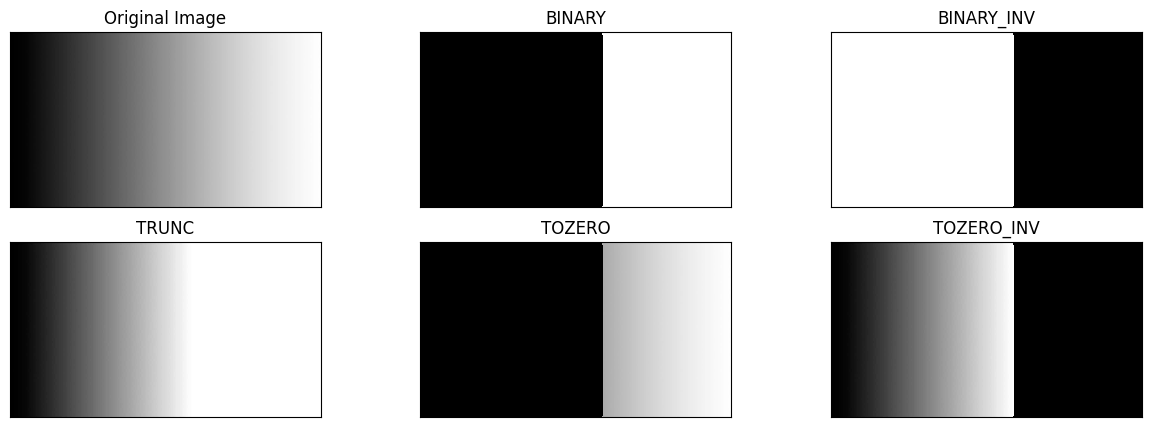

In [11]:
# Load the uploaded image
image_path = '/content/drive/MyDrive/PCVK/images/gradient.jpg'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Threshold value
thresh = 170

# Manually applying global thresholds
# 1. BINARY
binary = np.where(img > thresh, 255, 0).astype(np.uint8)

# 2. BINARY_INV
binary_inv = np.where(img > thresh, 0, 255).astype(np.uint8)

# 3. TRUNC
trunc = np.where(img > thresh, thresh, img).astype(np.uint8)

# 4. TOZERO
tozero = np.where(img > thresh, img, 0).astype(np.uint8)

# 5. TOZERO_INV
tozero_inv = np.where(img > thresh, 0, img).astype(np.uint8)

# Plotting the results
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

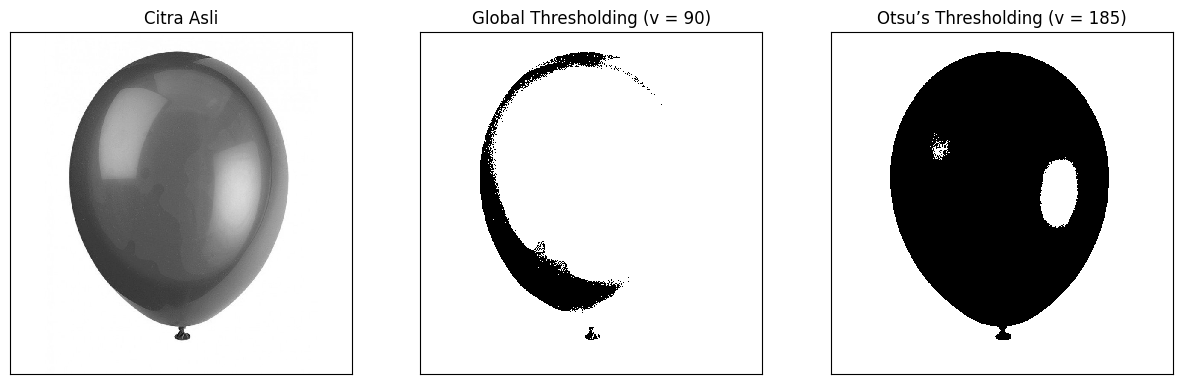

In [12]:
# Load the new image (balloon.jpg)
image_path = '/content/drive/MyDrive/PCVK/images/balloon.jpg'
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Apply Global Thresholding
global_thresh_value = 90
_, global_thresh = cv.threshold(img, global_thresh_value, 255, cv.THRESH_BINARY)

# Manually implement Otsu's thresholding
def otsu_thresholding(image):
    # Calculate histogram
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])

    total_pixels = image.shape[0] * image.shape[1]
    sum_all = np.sum([i * hist[i] for i in range(256)])

    sumB = 0
    weightB = 0
    max_variance = 0
    threshold = 0

    weightF = 0
    for i in range(256):
        weightB += hist[i]
        if weightB == 0:
            continue
        weightF = total_pixels - weightB
        if weightF == 0:
            break

        sumB += i * hist[i]
        meanB = sumB / weightB if weightB > 0 else 0
        meanF = (sum_all - sumB) / weightF if weightF > 0 else 0

        between_var = weightB * weightF * (meanB - meanF) ** 2
        if between_var > max_variance:
            max_variance = between_var
            threshold = i

    # Apply threshold
    otsu_thresh_img = np.where(image > threshold, 255, 0).astype(np.uint8)
    return otsu_thresh_img, threshold

# Apply Otsu's Thresholding
otsu_thresh, otsu_value = otsu_thresholding(img)

# Plot the results
titles = ['Citra Asli', f'Global Thresholding (v = {global_thresh_value})', f'Otsu’s Thresholding (v = {otsu_value})']
images = [img, global_thresh, otsu_thresh]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images. Petunjuk:
- anda dapat gunakan cv.calcHist untuk menampilkan histogram.
- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

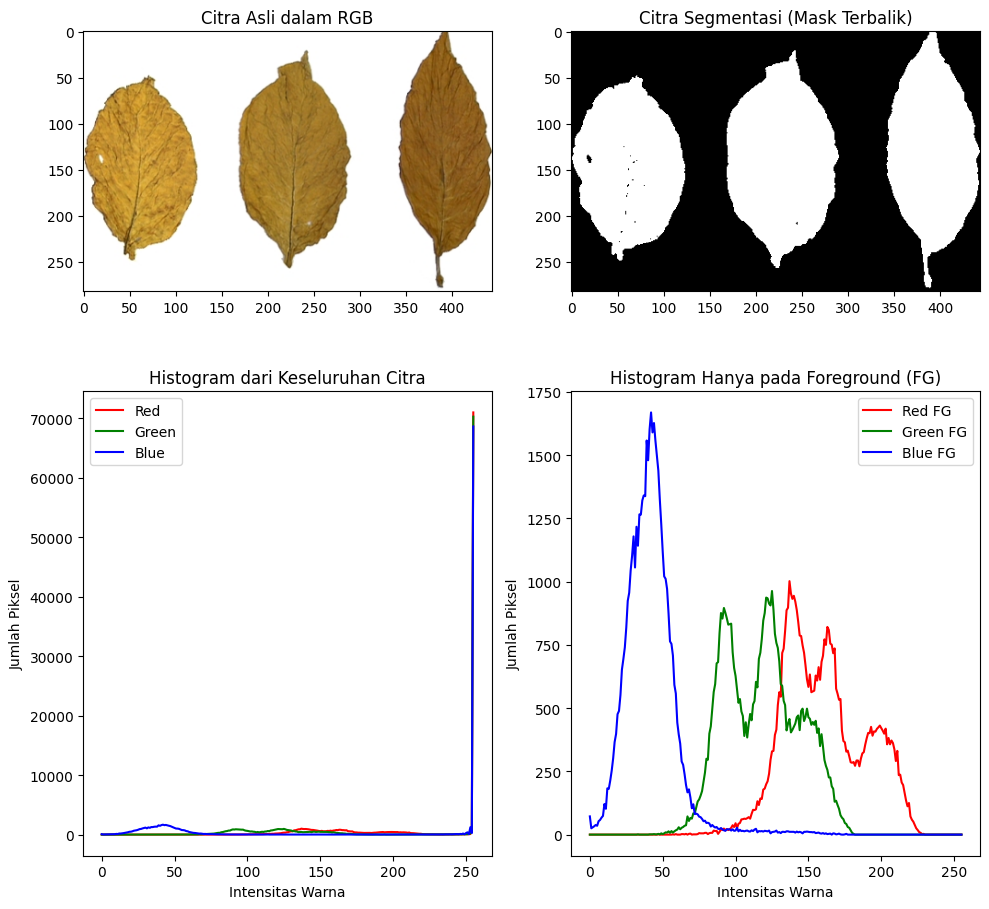

In [14]:
import cv2 as cv

# Langkah 1: Membaca gambar
tobacco_img = cv.imread('/content/drive/MyDrive/PCVK/images/tobacco.jpg')
image_rgb = cv.cvtColor(tobacco_img, cv.COLOR_BGR2RGB)

# Langkah 2: Membuat mask untuk menandai foreground (dengan sedikit modifikasi nilai threshold)
gray_image = cv.cvtColor(tobacco_img, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(gray_image, 180, 255, cv.THRESH_BINARY_INV)  # Membalik foreground jadi putih

# Langkah 3: Hitung histogram keseluruhan citra untuk setiap channel RGB
hist_total_r = cv.calcHist([tobacco_img], [2], None, [256], [0, 256])
hist_total_b = cv.calcHist([tobacco_img], [0], None, [256], [0, 256])
hist_total_g = cv.calcHist([tobacco_img], [1], None, [256], [0, 256])

# Langkah 4: Hitung histogram hanya pada foreground dengan menggunakan mask (untuk setiap channel RGB)
hist_fg_r = cv.calcHist([image_rgb], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([image_rgb], [1], mask, [256], [0, 256])
hist_fg_b = cv.calcHist([image_rgb], [2], mask, [256], [0, 256])

# Langkah 5: Tampilkan hasilnya
plt.figure(figsize=(10, 10))

# Plot 1: Tampilkan citra asli dalam RGB
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli dalam RGB')

# Plot 2: Tampilkan citra segmentasi dengan mask
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segmentasi (Mask Terbalik)')

# Plot 3: Histogram dari keseluruhan citra untuk setiap channel RGB
plt.subplot(2, 2, 3)
plt.plot(hist_total_r, color='r', label='Red')
plt.plot(hist_total_g, color='g', label='Green')
plt.plot(hist_total_b, color='b', label='Blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.legend()

# Plot 4: Histogram hanya untuk foreground (FG) objek
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red FG')
plt.plot(hist_fg_g, color='g', label='Green FG')
plt.plot(hist_fg_b, color='b', label='Blue FG')
plt.title('Histogram Hanya pada Foreground (FG)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.tight_layout()
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

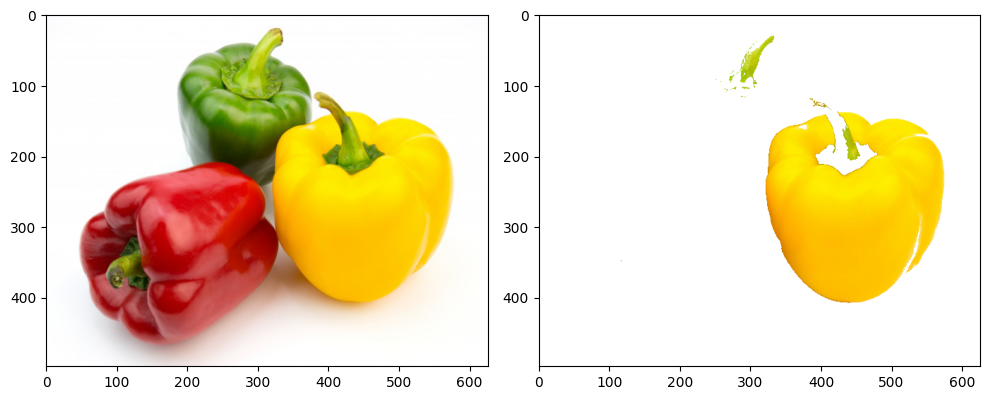

In [15]:
# Langkah 1: Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/images/peppers.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Ubah dari BGR ke RGB

# Langkah 2: Ubah gambar menjadi data 2D untuk K-Means
pixel_values = image.reshape((-1, 3))  # Bentuk ulang gambar menjadi array 2D
pixel_values = np.float32(pixel_values)  # Ubah ke tipe data float32

# Langkah 3: Tetapkan k dan lakukan K-Means clustering
k = 5  # Jumlah cluster yang digunakan
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Langkah 4: Ubah label hasil clustering ke warna
segmented_image = centers[labels.flatten()]  # Ambil nilai pusat cluster
segmented_image = segmented_image.reshape(image.shape)  # Ubah kembali ke bentuk gambar asli

# Langkah 5: Ubah segmented image ke HSV untuk segmentasi warna kuning
hsv_image = cv.cvtColor(segmented_image.astype(np.uint8), cv.COLOR_RGB2HSV)

# Definisikan batas warna kuning dalam ruang warna HSV
lower_yellow = np.array([20, 100, 100])  # Batas bawah warna kuning
upper_yellow = np.array([30, 255, 255])  # Batas atas warna kuning

# Membuat mask untuk warna kuning
yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

# Langkah 6: Terapkan mask pada gambar asli
result = cv.bitwise_and(image, image, mask=yellow_mask)

# Langkah 7: Ubah latar belakang menjadi putih
# Buat latar belakang putih
white_background = np.full(image.shape, 255, dtype=np.uint8)  # Membuat gambar putih dengan ukuran yang sama

# Gabungkan hasil segmentasi dengan latar belakang putih
result_with_white_bg = np.where(yellow_mask[:, :, np.newaxis] == 255, result, white_background)

# Menampilkan gambar asli
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('on')

# Menampilkan hasil segmentasi
plt.subplot(1, 2, 2)
plt.imshow(result_with_white_bg)
plt.axis('on')

plt.tight_layout()
plt.show()

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.

**Jawab:**

Dalam proses segmentasi citra, beberapa kendala dapat muncul saat menampilkan warna tertentu, seperti ketidakakuratan dalam batas warna pada ruang warna HSV. Jika batas bawah dan atas untuk warna kuning tidak mencakup semua variasi warna kuning dalam gambar, mask yang dihasilkan mungkin menjadi hitam, sehingga ketika diterapkan pada gambar asli, hanya menampilkan gambar berwarna hitam. Selain itu, kesalahan dalam konversi warna dan pengaturan K-Means yang tidak tepat juga dapat memengaruhi hasil segmentasi. Misalnya, jika jumlah cluster yang dipilih dalam K-Means terlalu sedikit atau terlalu banyak, warna kuning bisa jadi tidak terdeteksi dengan baik.

Untuk mengatasi masalah ini, penyesuaian pada batas warna dan parameter K-Means sangat diperlukan. Memvisualisasikan mask secara terpisah sebelum diaplikasikan pada gambar asli dapat membantu memastikan bahwa mask bekerja dengan benar. Bereksperimen dengan berbagai nilai HSV serta memahami karakteristik warna dalam gambar juga penting untuk mencapai segmentasi warna yang efektif.

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

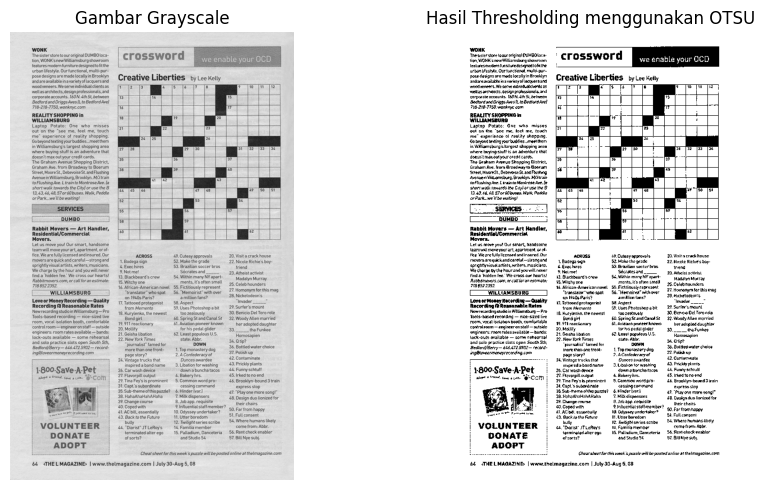

In [16]:
# Langkah 1: Baca gambar
crossword_img = cv.imread('/content/drive/MyDrive/PCVK/images/crossword.jpg')

# Langkah 2: Ubah gambar ke grayscale
gray_crossword = cv.cvtColor(crossword_img, cv.COLOR_BGR2GRAY)

# Langkah 3: Lakukan thresholding biner menggunakan Otsu
ret, binary_crossword = cv.threshold(gray_crossword, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Langkah 4: Tampilkan hasil
plt.figure(figsize=(10, 5))

# Tampilkan gambar grayscale
plt.subplot(1, 2, 1)
plt.imshow(gray_crossword, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Tampilkan hasil thresholding biner
plt.subplot(1, 2, 2)
plt.imshow(binary_crossword, cmap='gray')
plt.title('Hasil Thresholding menggunakan OTSU')
plt.axis('off')

plt.tight_layout()
plt.show()